Author : Jang, Hye Jin, jhj2498@naver.com
Supervisor : Na, In Seop, ypencil@hanmail.net
Starting Project : 2019.1.4

In [1]:
%matplotlib inline
#Basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
#Plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Format
from datetime import datetime


In [2]:
df_train = pd.read_csv("../input/train.csv",index_col=None)
df_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [3]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
Crime_Categories = list(df_train.loc[:,"Category"].unique())
print("Number of crime categories: " + str(len(Crime_Categories)))
for crime in Crime_Categories:
    print(crime)

Number of crime categories: 39
WARRANTS
OTHER OFFENSES
LARCENY/THEFT
VEHICLE THEFT
VANDALISM
NON-CRIMINAL
ROBBERY
ASSAULT
WEAPON LAWS
BURGLARY
SUSPICIOUS OCC
DRUNKENNESS
FORGERY/COUNTERFEITING
DRUG/NARCOTIC
STOLEN PROPERTY
SECONDARY CODES
TRESPASS
MISSING PERSON
FRAUD
KIDNAPPING
RUNAWAY
DRIVING UNDER THE INFLUENCE
SEX OFFENSES FORCIBLE
PROSTITUTION
DISORDERLY CONDUCT
ARSON
FAMILY OFFENSES
LIQUOR LAWS
BRIBERY
EMBEZZLEMENT
SUICIDE
LOITERING
SEX OFFENSES NON FORCIBLE
EXTORTION
GAMBLING
BAD CHECKS
TREA
RECOVERED VEHICLE
PORNOGRAPHY/OBSCENE MAT


[Text(0,0,'LARCENY/THEFT'),
 Text(0,0,'OTHER OFFENSES'),
 Text(0,0,'NON-CRIMINAL'),
 Text(0,0,'ASSAULT'),
 Text(0,0,'DRUG/NARCOTIC'),
 Text(0,0,'VEHICLE THEFT'),
 Text(0,0,'VANDALISM'),
 Text(0,0,'WARRANTS'),
 Text(0,0,'BURGLARY'),
 Text(0,0,'SUSPICIOUS OCC'),
 Text(0,0,'MISSING PERSON'),
 Text(0,0,'ROBBERY'),
 Text(0,0,'FRAUD'),
 Text(0,0,'FORGERY/COUNTERFEITING'),
 Text(0,0,'SECONDARY CODES'),
 Text(0,0,'WEAPON LAWS'),
 Text(0,0,'PROSTITUTION'),
 Text(0,0,'TRESPASS'),
 Text(0,0,'STOLEN PROPERTY'),
 Text(0,0,'SEX OFFENSES FORCIBLE'),
 Text(0,0,'DISORDERLY CONDUCT'),
 Text(0,0,'DRUNKENNESS'),
 Text(0,0,'RECOVERED VEHICLE'),
 Text(0,0,'KIDNAPPING'),
 Text(0,0,'DRIVING UNDER THE INFLUENCE'),
 Text(0,0,'RUNAWAY'),
 Text(0,0,'LIQUOR LAWS'),
 Text(0,0,'ARSON'),
 Text(0,0,'LOITERING'),
 Text(0,0,'EMBEZZLEMENT'),
 Text(0,0,'SUICIDE'),
 Text(0,0,'FAMILY OFFENSES'),
 Text(0,0,'BAD CHECKS'),
 Text(0,0,'BRIBERY'),
 Text(0,0,'EXTORTION'),
 Text(0,0,'SEX OFFENSES NON FORCIBLE'),
 Text(0,0,'GAMBLING

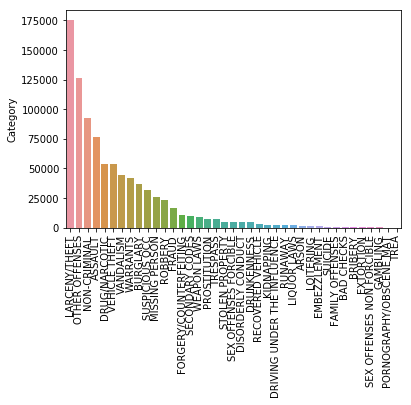

In [5]:
number_of_crimes = df_train.Category.value_counts()

_n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
_n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


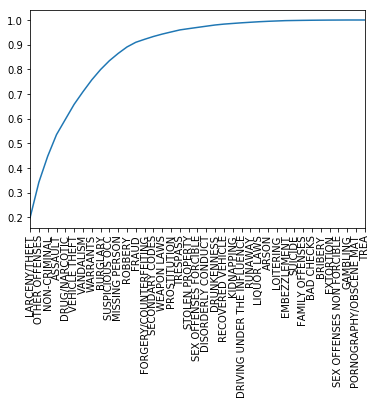

In [6]:
pareto_crime = number_of_crimes / sum(number_of_crimes)
pareto_crime = pareto_crime.cumsum()
_pareto_crime_plot = sns.tsplot(data=pareto_crime)
_pareto_crime_plot.set_xticklabels(pareto_crime.index,rotation=90)
_pareto_crime_plot.set_xticks(np.arange(len(pareto_crime)))

In [7]:
Main_Crime_Categories = list(pareto_crime[0:8].index)
print("The following categories :")
print(Main_Crime_Categories)
print("make up to {:.2%} of the crimes".format(pareto_crime[8]))

The following categories :
['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS']
make up to 79.92% of the crimes


In [8]:
df_train.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [9]:
df_train.head().Dates

0    2015-05-13 23:53:00
1    2015-05-13 23:53:00
2    2015-05-13 23:33:00
3    2015-05-13 23:30:00
4    2015-05-13 23:30:00
Name: Dates, dtype: object

In [10]:
origin_date = datetime.strptime('2003-01-01 00:00:00','%Y-%m-%d %H:%M:%S')

def delta_origin_date(dt):
    _ = datetime.strptime(dt,'%Y-%m-%d %H:%M:%S') - origin_date
    return(_.days+(_.seconds/86400))

delta_origin_date(df_train.loc[1,"Dates"])

4515.9951388888885

tmp = df_train.loc[:,["Dates","Category"]]
tmp["RelativeDates"]=df_train.Dates.map(delta_origin_date)
tmp.head()

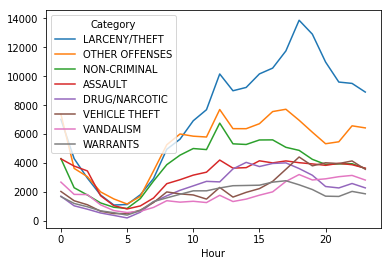

In [11]:
tmp = df_train.loc[:,["Dates","Category"]]

tmp.loc[:,"Hour"] = df_train.Dates.map(lambda d: datetime.strptime(d,'%Y-%m-%d %H:%M:%S').hour)
tmp.describe()

pt = pd.pivot_table(tmp,index="Hour",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pt.loc[:,Main_Crime_Categories].plot()

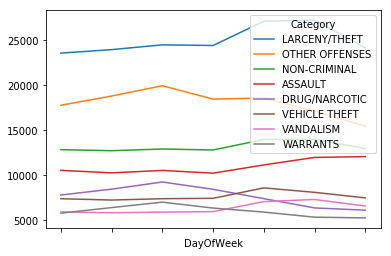

In [12]:
tmp = df_train.loc[:,["DayOfWeek","Category"]]
pt = pd.pivot_table(tmp,index="DayOfWeek",columns="Category",aggfunc=len,fill_value=0)
pt.loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], 
       Main_Crime_Categories].plot()

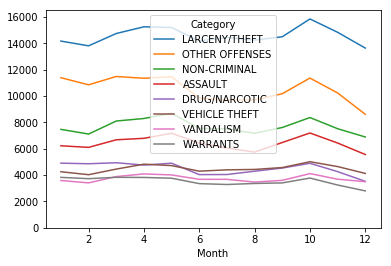

In [13]:
tmp = df_train.loc[:,["Dates","Category"]]
tmp.loc[:,"Month"] = tmp.Dates.map(lambda dt: datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').month)
pt = pd.pivot_table(tmp,index="Month",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pt.loc[:,Main_Crime_Categories].plot(ylim=0)

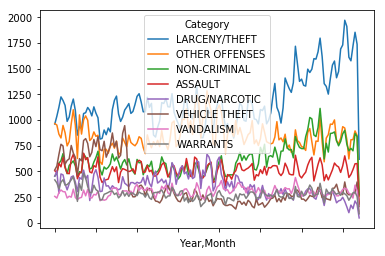

In [14]:
tmp.loc[:,"Year"] = tmp.Dates.map(lambda dt: datetime.strptime(dt,'%Y-%m-%d %H:%M:%S').year)
pt = pd.pivot_table(tmp,index=["Year","Month"],columns="Category",aggfunc=len,fill_value=0)["Dates"]
pt[Main_Crime_Categories].plot()

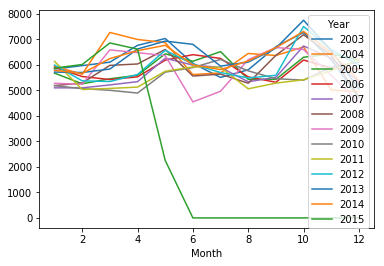

In [15]:
pt = pd.pivot_table(tmp,index="Month",columns="Year",aggfunc=len,fill_value=0)["Dates"]
pt.plot()

[Text(0,0,'SOUTHERN'),
 Text(0,0,'MISSION'),
 Text(0,0,'NORTHERN'),
 Text(0,0,'BAYVIEW'),
 Text(0,0,'CENTRAL'),
 Text(0,0,'TENDERLOIN'),
 Text(0,0,'INGLESIDE'),
 Text(0,0,'TARAVAL'),
 Text(0,0,'PARK'),
 Text(0,0,'RICHMOND')]

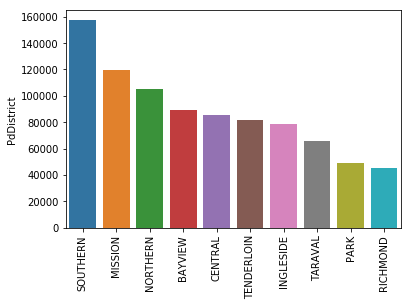

In [16]:
most_dangerous_districts = df_train.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

In [17]:
def correct_coordinates(district):
    tmp = df_train[df_train["PdDistrict"] == district]
    x_avg = tmp.X.mean()
    y_avg = tmp.Y.mean()
    return([x_avg,y_avg])

index_to_correct = df_train[(df_train["X"] > -121)|(df_train["Y"] > 50)].index

for i in index_to_correct:
    tmp = correct_coordinates(df_train.loc[i,"PdDistrict"])
    x = tmp[0]
    y = tmp[1]
    df_train.loc[i,"X"] = x 
    df_train.loc[i,"Y"] = y

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537:

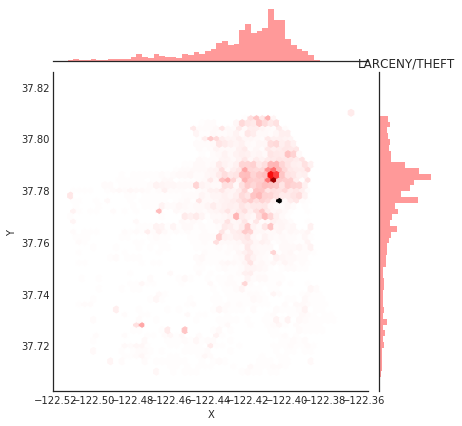

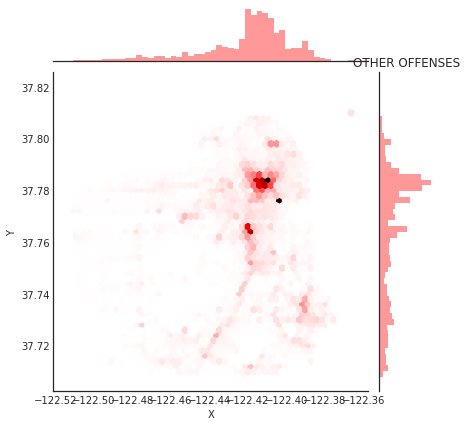

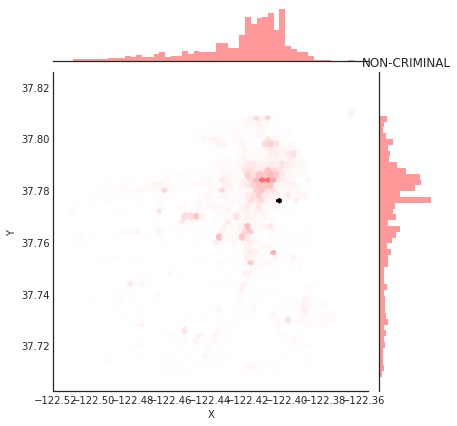

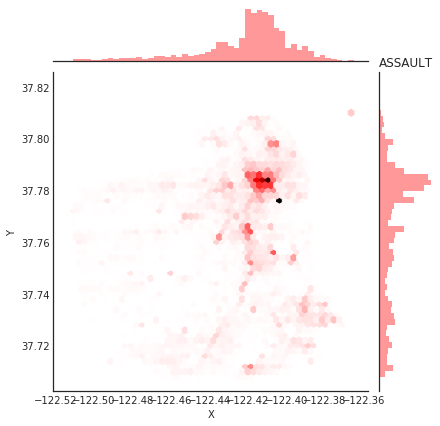

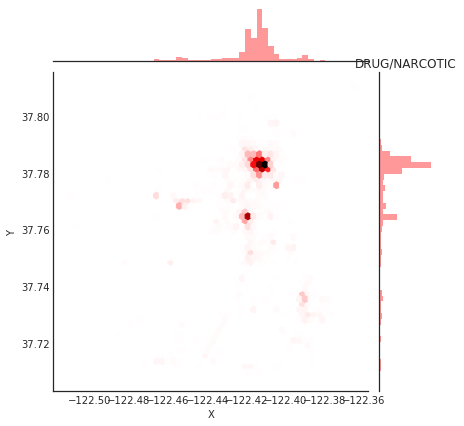

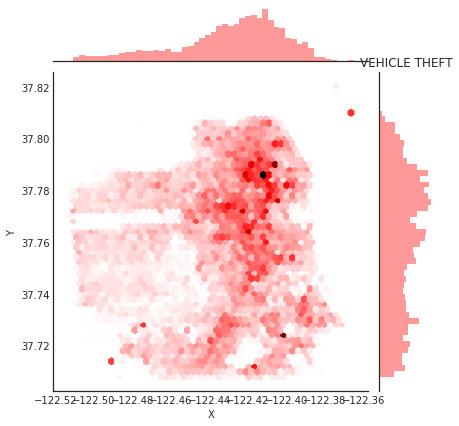

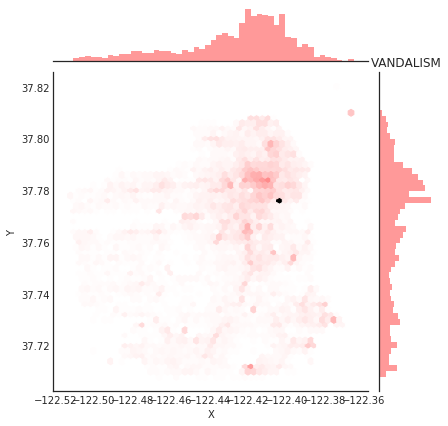

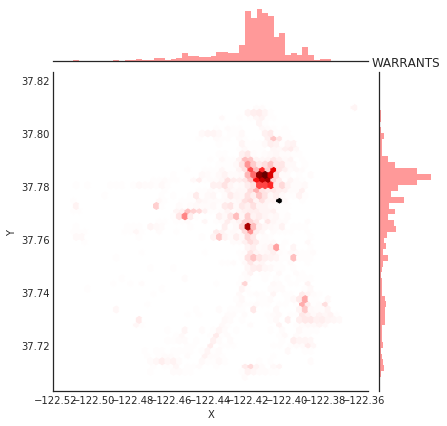

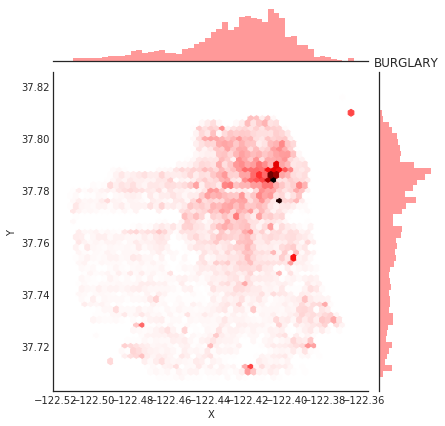

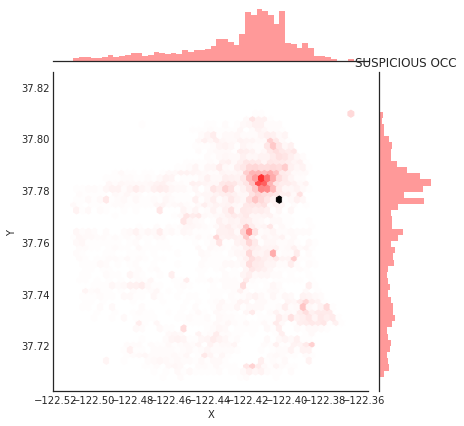

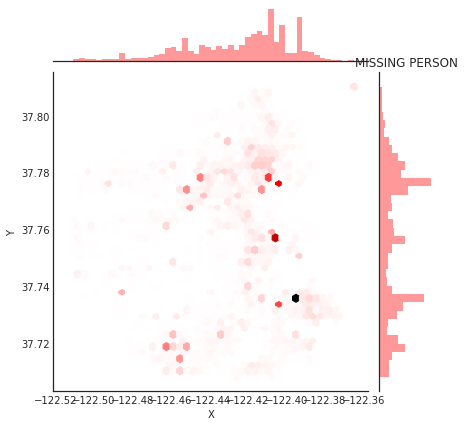

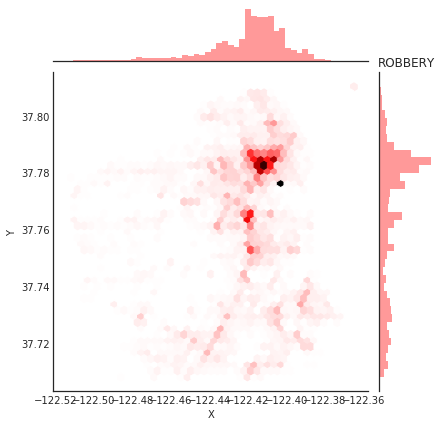

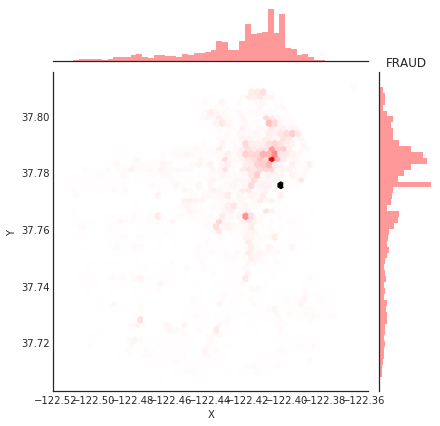

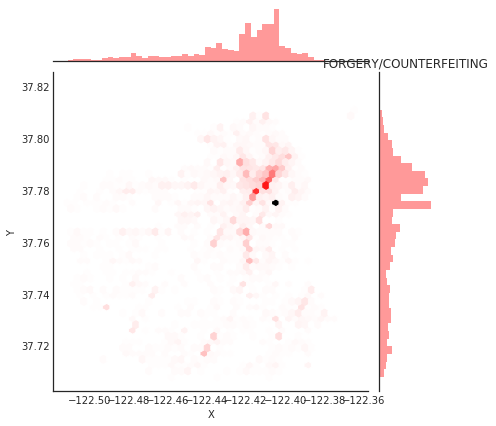

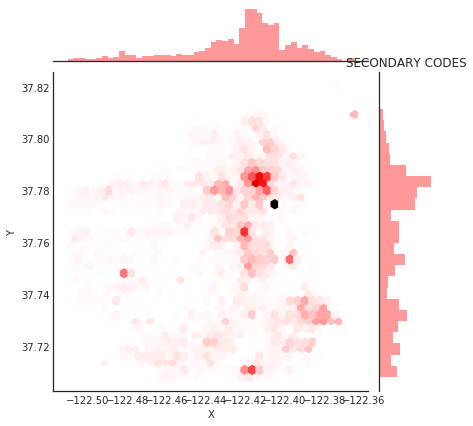

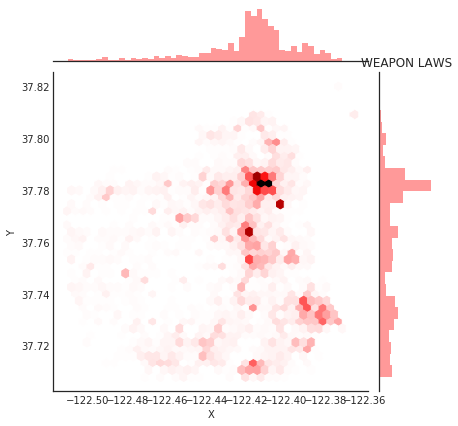

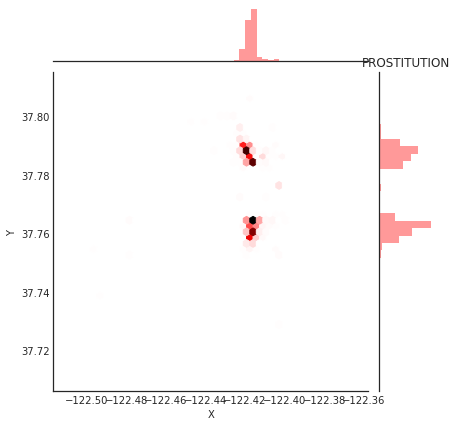

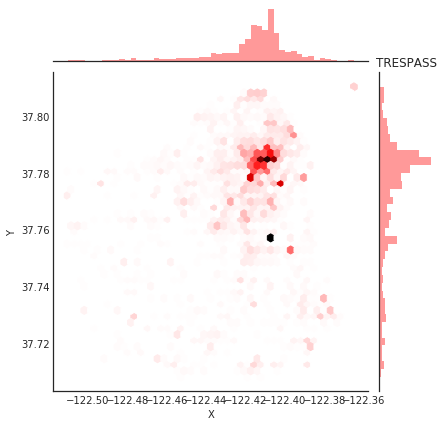

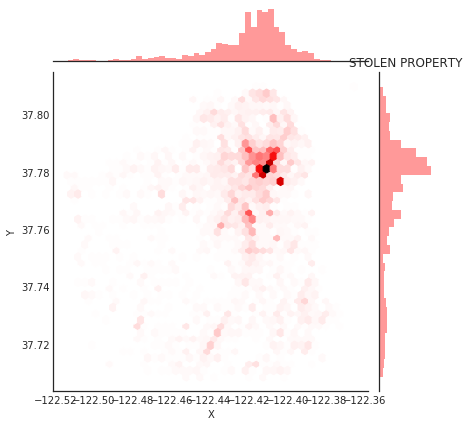

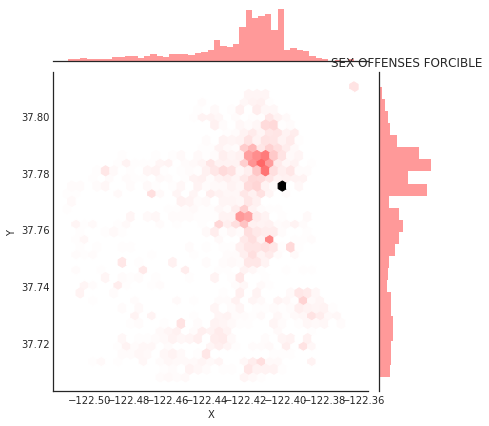

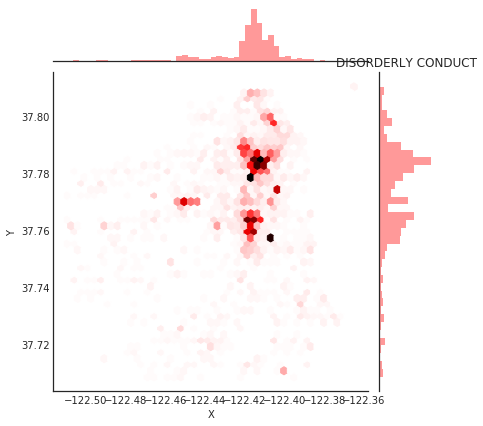

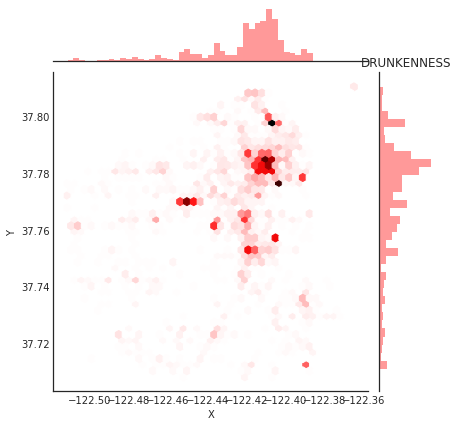

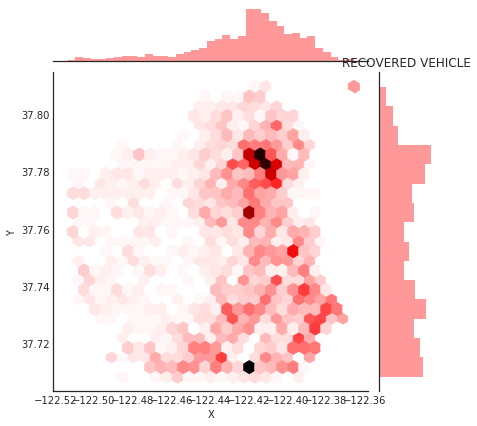

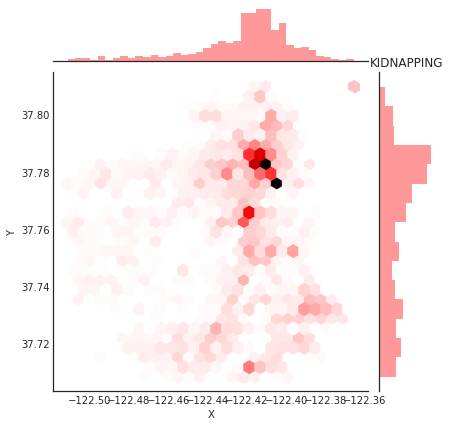

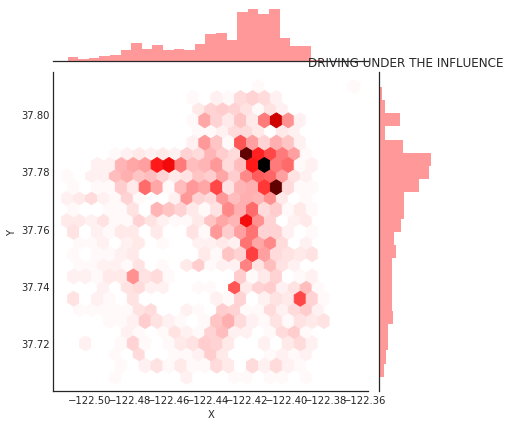

In [18]:

for c in pareto_crime.index[:25]:
    df_tmp = df_train.loc[df_train.Category == c,["X","Y"]]
    with sns.axes_style("white"):
        sns.jointplot(x=df_tmp["X"] , y=df_tmp["Y"], stat_func = None,kind="hex", color="r");
        plt.title(c)

In [19]:
df_test = pd.read_csv("../input/test.csv",index_col=None)
df_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [20]:
model_null = df_test[["Id"]]
for crime in Crime_Categories:
    model_null[crime] = number_of_crimes[crime]/sum(number_of_crimes)
model_null.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,WARRANTS,OTHER OFFENSES,LARCENY/THEFT,VEHICLE THEFT,VANDALISM,NON-CRIMINAL,ROBBERY,ASSAULT,WEAPON LAWS,...,EMBEZZLEMENT,SUICIDE,LOITERING,SEX OFFENSES NON FORCIBLE,EXTORTION,GAMBLING,BAD CHECKS,TREA,RECOVERED VEHICLE,PORNOGRAPHY/OBSCENE MAT
0,0,0.048077,0.143707,0.199192,0.061251,0.050937,0.105124,0.026194,0.087553,0.009743,...,0.001328,0.000579,0.001395,0.000169,0.000292,0.000166,0.000462,0.000007,0.003574,0.000025
1,1,0.048077,0.143707,0.199192,0.061251,0.050937,0.105124,0.026194,0.087553,0.009743,...,0.001328,0.000579,0.001395,0.000169,0.000292,0.000166,0.000462,0.000007,0.003574,0.000025
2,2,0.048077,0.143707,0.199192,0.061251,0.050937,0.105124,0.026194,0.087553,0.009743,...,0.001328,0.000579,0.001395,0.000169,0.000292,0.000166,0.000462,0.000007,0.003574,0.000025
3,3,0.048077,0.143707,0.199192,0.061251,0.050937,0.105124,0.026194,0.087553,0.009743,...,0.001328,0.000579,0.001395,0.000169,0.000292,0.000166,0.000462,0.000007,0.003574,0.000025
4,4,0.048077,0.143707,0.199192,0.061251,0.050937,0.105124,0.026194,0.087553,0.009743,...,0.001328,0.000579,0.001395,0.000169,0.000292,0.000166,0.000462,0.000007,0.003574,0.000025


In [21]:
model_null.to_csv("model_null.csv")